In [1]:
from matplotlib import pyplot
import numpy
import torch
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)


def f(x): return 3*x**2 + 2*x + 1
def quad(a, b, c, x): return a * x ** 2 + b * x + c
def make_quad(a, b, c): return partial(quad, a, b, c)
def mean_absolute_error(predictions, actuals): return torch.abs(predictions - actuals).mean()
def noise(x, scale): return numpy.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)
numpy.random.seed(42)
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)
def quad_mean_absolute_error(params):
	f = make_quad(*params)
	return mean_absolute_error(f(x), y)


In [2]:
abc = torch.tensor([1.1, 1.1, 1.1])
abc.requires_grad_()

loss = quad_mean_absolute_error(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [3]:
loss.backward()

In [4]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [5]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mean_absolute_error(abc)
    
print(f'loss={loss:.2f}')

loss=2.40


In [6]:
for i in range(10):
    loss = quad_mean_absolute_error(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'Step={i}; loss={loss:.2f}')

Step=0; loss=2.40
Step=1; loss=2.36
Step=2; loss=2.30
Step=3; loss=2.21
Step=4; loss=2.11
Step=5; loss=1.98
Step=6; loss=1.85
Step=7; loss=1.72
Step=8; loss=1.58
Step=9; loss=1.46


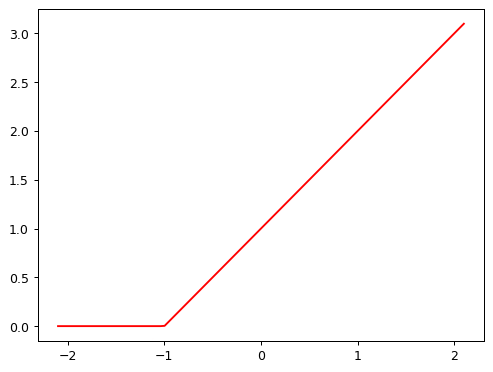

In [8]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

plot_function(partial(rectified_linear, 1, 1))

In [9]:
@interact(m=1.5,b=1.5)
def plot_relu(m,b):
    plot_function(partial(rectified_linear, m,b))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…